## Tighten circle
Extension to the `jiggle_circle` method that also iteratively refines circle's radius.

### 1. Imports

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from helpers.misc import tighten_circle


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2. Simple visualization

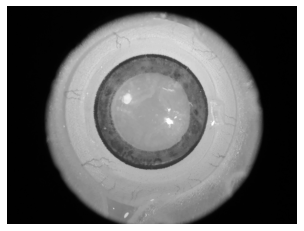

In [15]:
im = cv2.imread('data/artificial/base3.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

### 3. Generating dummy data

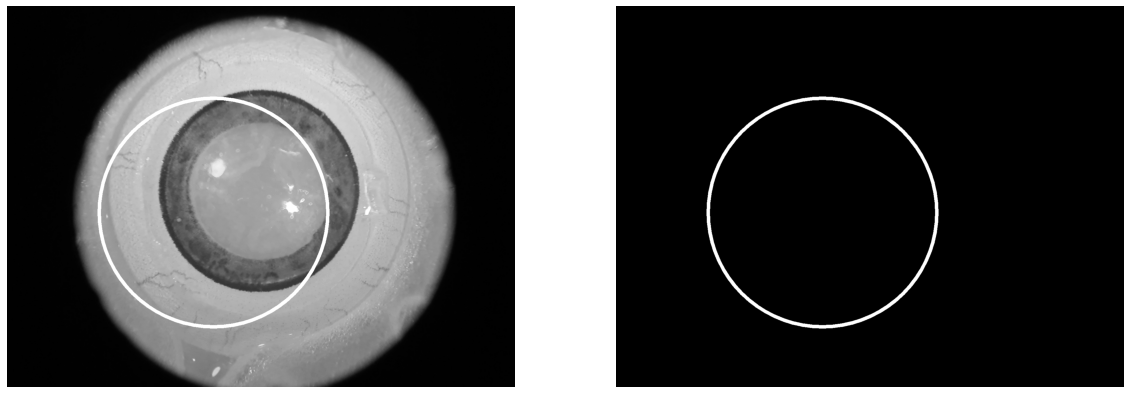

In [16]:
CORRECT_CIRCLE = np.array((800, 580, 320))
INIT_CIRCLE = np.array((650, 650, 360))

im_c = im.copy()
mask = np.zeros(im_c.shape, dtype=np.byte)
cv2.circle(im_c, (INIT_CIRCLE[0], INIT_CIRCLE[1]), INIT_CIRCLE[2], 255, 10)
cv2.circle(mask, (INIT_CIRCLE[0], INIT_CIRCLE[1]), INIT_CIRCLE[2], 1, 10)

_, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(im_c, cmap='gray')
axs[0].axis('off')

axs[1].imshow(mask, cmap='gray')
axs[1].axis('off')

plt.show()

### 4. Visulizing iterations

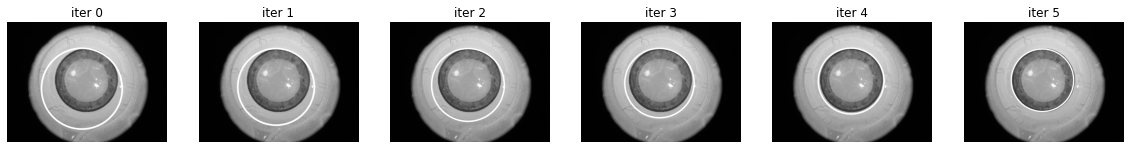

correct  [800 580 320] 
detected  [790.8592  589.8225  306.41727]


In [17]:
circle, intermediates = tighten_circle(
    im, INIT_CIRCLE, beta=0.95, return_intermediates=True)

_, axs = plt.subplots(1, 6, figsize=(20, 10))
for i in range(len(intermediates)):
    axs[i].set_title('iter %d' % i)
    axs[i].imshow(intermediates[i], cmap='gray')
    axs[i].axis('off')

plt.show()
print('correct ', CORRECT_CIRCLE, '\ndetected ', circle)